In [167]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
import gdown
file_id = '1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB'
url = f'https://drive.google.com/uc?id={file_id}'


gdown.download(url, 'mydata.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB
From (redirected): https://drive.google.com/uc?id=1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB&confirm=t&uuid=1e1663e6-04e5-4280-94f4-af91e4038623
To: /content/mydata.csv
100%|██████████| 794M/794M [00:20<00:00, 39.4MB/s]


'mydata.csv'

In [169]:
import pandas as pd

df_divar = pd.read_csv('mydata.csv')
df_divar.head()


<ipython-input-169-6223453887f8>:3: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_divar = pd.read_csv('mydata.csv')


,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df_divar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [171]:
!pip install utm

In [172]:
import pandas as pd
import utm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [173]:
selected_features = [
    'price_value', 'location_latitude', 'location_longitude',
    'rooms_count', 'building_size', 'construction_year',
    'has_parking'
]

df_divar_clean = df_divar[selected_features].copy()
df_divar_clean



,price_value,location_latitude,location_longitude,rooms_count,building_size,construction_year,has_parking
0,NaN,35.811684,50.936600,سه,500.0,NaN,NaN
1,8.500000e+09,NaN,NaN,یک,60.0,۱۳۸۴,True
2,NaN,35.703865,51.373459,سه,132.0,۱۴۰۱,True
3,NaN,NaN,NaN,یک,90.0,۱۴۰۰,True
4,5.750000e+09,NaN,NaN,دو,115.0,۱۴۰۳,True
...,...,...,...,...,...,...,...
999995,7.470000e+09,34.350235,47.083241,چهار,180.0,۱۴۰۳,True
999996,NaN,35.770454,51.369099,دو,110.0,۱۴۰۳,True
999997,3.200000e+09,NaN,NaN,چهار,200.0,قبل از ۱۳۷۰,True
999998,NaN,37.483501,49.438721,دو,70.0,NaN,NaN


In [174]:
def convert_rooms_count(value):
    mapping = {
        'بدون اتاق': 0,
        'یک': 1,
        'دو': 2,
        'سه': 3,
        'چهار': 4,
        'پنج': 5,
        'پنج یا بیشتر': 5
    }
    if pd.isna(value):
        return None
    value = str(value).strip().replace('\u200c', '')
    return mapping.get(value, None)


def convert_persian_digits(text):
    persian_to_english = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
    return str(text).translate(persian_to_english)



In [175]:
df_divar_clean['construction_year'] = df_divar_clean['construction_year'].replace('قبل از ۱۳۷۰', '۱۳۶۵')


In [176]:
df_divar_clean['construction_year'] = df_divar_clean['construction_year'].apply(convert_persian_digits).astype(float)

df_divar_clean['rooms_count'] = df_divar_clean['rooms_count'].apply(convert_rooms_count)

df_divar_clean

,price_value,location_latitude,location_longitude,rooms_count,building_size,construction_year,has_parking
0,NaN,35.811684,50.936600,3.0,500.0,NaN,NaN
1,8.500000e+09,NaN,NaN,1.0,60.0,1384.0,True
2,NaN,35.703865,51.373459,3.0,132.0,1401.0,True
3,NaN,NaN,NaN,1.0,90.0,1400.0,True
4,5.750000e+09,NaN,NaN,2.0,115.0,1403.0,True
...,...,...,...,...,...,...,...
999995,7.470000e+09,34.350235,47.083241,4.0,180.0,1403.0,True
999996,NaN,35.770454,51.369099,2.0,110.0,1403.0,True
999997,3.200000e+09,NaN,NaN,4.0,200.0,1365.0,True
999998,NaN,37.483501,49.438721,2.0,70.0,NaN,NaN


In [177]:
df_divar_clean.describe()
df_divar_clean.info()
df_divar_clean.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price_value         568346 non-null  float64
 1   location_latitude   655608 non-null  float64
 2   location_longitude  655608 non-null  float64
 3   rooms_count         845899 non-null  float64
 4   building_size       980394 non-null  float64
 5   construction_year   815828 non-null  float64
 6   has_parking         728156 non-null  object 
dtypes: float64(6), object(1)
memory usage: 53.4+ MB


,price_value,location_latitude,location_longitude,rooms_count,building_size,construction_year,has_parking
999995,7.470000e+09,34.350235,47.083241,4.0,180.0,1403.0,True
999996,NaN,35.770454,51.369099,2.0,110.0,1403.0,True
999997,3.200000e+09,NaN,NaN,4.0,200.0,1365.0,True
999998,NaN,37.483501,49.438721,2.0,70.0,NaN,NaN
999999,NaN,35.680767,51.365299,1.0,40.0,1382.0,False


In [178]:
df_divar_clean.isnull().mean() * 100

,0
price_value,43.1654
location_latitude,34.4392
location_longitude,34.4392
rooms_count,15.4101
building_size,1.9606
construction_year,18.4172
has_parking,27.1844


In [179]:
###data preprocessing

In [180]:
df_divar_clean['has_parking'].fillna(False, inplace=True)

<ipython-input-180-45de92b04e7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_divar_clean['has_parking'].fillna(False, inplace=True)
<ipython-input-180-45de92b04e7c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_divar_clean['has_parking'].fillna(False, inplace=True)


In [181]:
df_divar_clean = df_divar_clean.dropna(subset=['price_value'])

In [182]:
df_divar_clean['rooms_count'].fillna(df_divar_clean['rooms_count'].median(), inplace=True)

<ipython-input-182-364712ad2ff2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_divar_clean['rooms_count'].fillna(df_divar_clean['rooms_count'].median(), inplace=True)
<ipython-input-182-364712ad2ff2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean['rooms_count'].fillna(df_divar_clean['rooms_count'].median(), inplace=True)

In [183]:
df_divar_clean['building_size'].fillna(df_divar_clean['building_size'].median(), inplace=True)

<ipython-input-183-706c8edff3c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_divar_clean['building_size'].fillna(df_divar_clean['building_size'].median(), inplace=True)
<ipython-input-183-706c8edff3c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean['building_size'].fillna(df_divar_clean['building_size'].median(), inpla

In [184]:
df_divar_clean['construction_year'].fillna(df_divar_clean['construction_year'].median(), inplace=True)

<ipython-input-184-02eed90dfa76>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_divar_clean['construction_year'].fillna(df_divar_clean['construction_year'].median(), inplace=True)
<ipython-input-184-02eed90dfa76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean['construction_year'].fillna(df_divar_clean['construction_year']

In [185]:
df_divar_clean['location_longitude'].value_counts()

,count
location_longitude,
46.294880,346
51.021194,312
51.016659,245
52.013897,193
52.101719,161
...,...
51.872967,1
49.699360,1
58.801113,1


In [186]:
df_divar_clean.isnull().sum()


,0
price_value,0
location_latitude,196227
location_longitude,196227
rooms_count,0
building_size,0
construction_year,0
has_parking,0


In [187]:
df_divar_clean.dropna(subset=['location_latitude', 'location_longitude'], inplace=True)

<ipython-input-187-3e3647315fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean.dropna(subset=['location_latitude', 'location_longitude'], inplace=True)


In [188]:
df_divar_clean['has_parking'] = df_divar_clean['has_parking'].astype(int)


<ipython-input-188-048e0d66b4bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean['has_parking'] = df_divar_clean['has_parking'].astype(int)


In [189]:
df_divar_clean['construction_year'].describe()

,construction_year
count,372119.000000
mean,1394.399386
std,8.112997
min,1365.000000
25%,1391.000000
50%,1396.000000
75%,1401.000000
max,1403.000000


In [190]:
df_divar_clean['building_age'] = 1404 - df_divar_clean['construction_year']
df_divar_clean.drop(columns=['construction_year'], inplace=True)

<ipython-input-190-7eaacc060f5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean['building_age'] = 1404 - df_divar_clean['construction_year']
<ipython-input-190-7eaacc060f5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divar_clean.drop(columns=['construction_year'], inplace=True)


In [191]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

رسم هیستوگرام داده‌ها

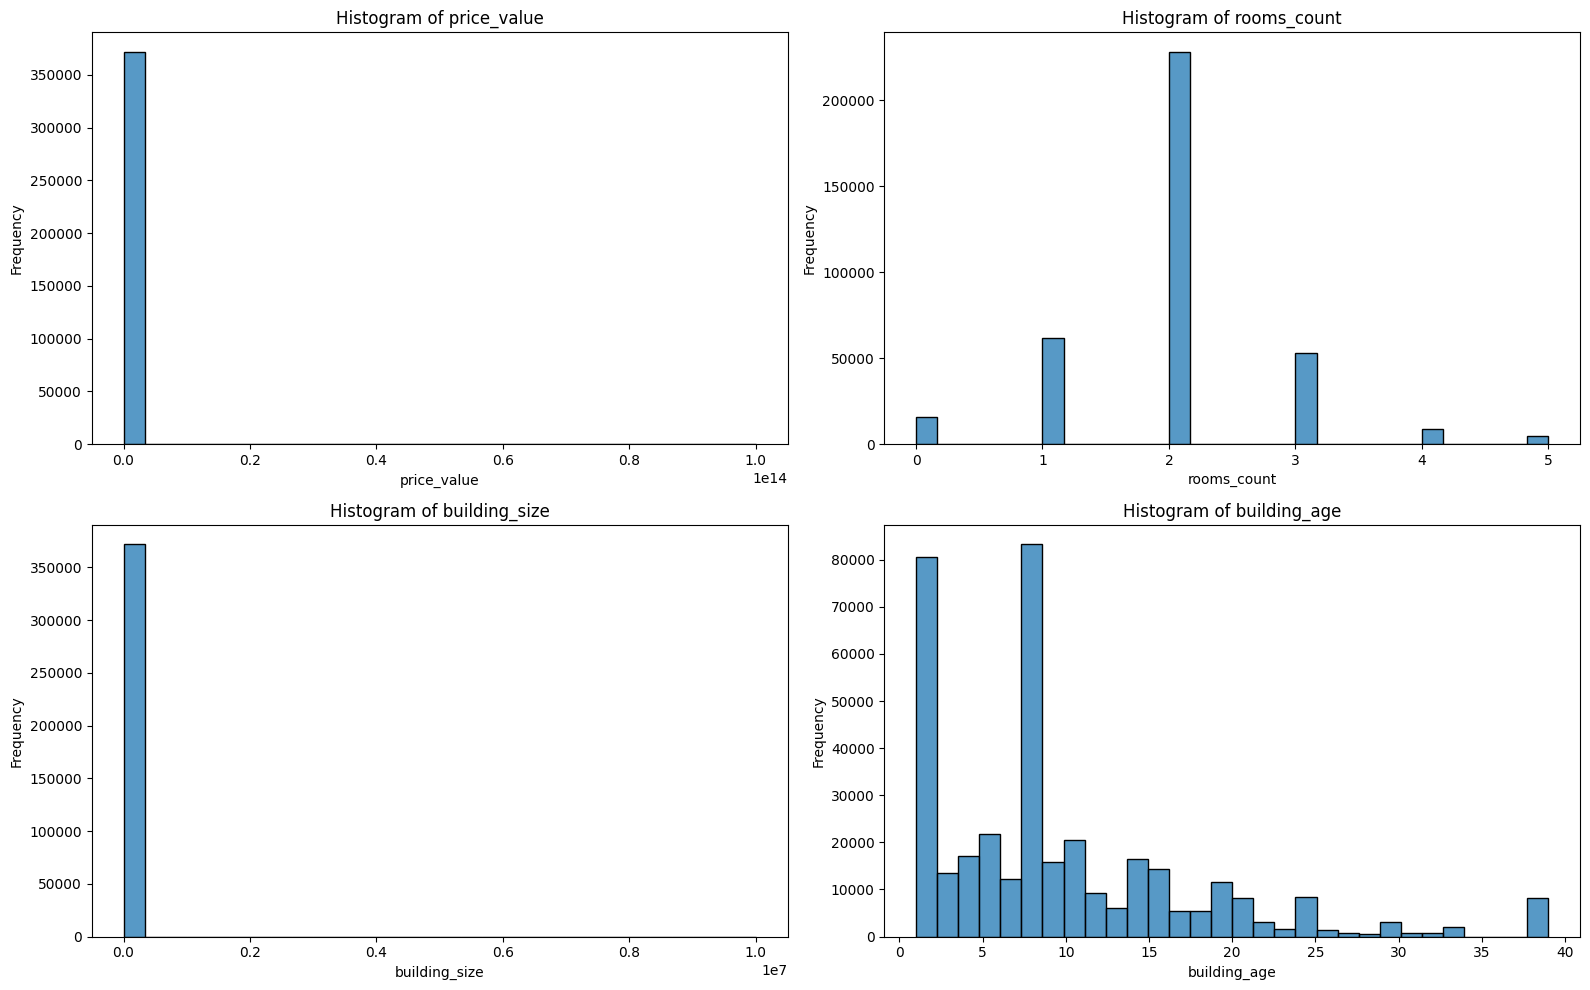

In [192]:
columns_for_hist = ['price_value', 'rooms_count', 'building_size', 'building_age']


plt.figure(figsize=(16, 10))
for i, col in enumerate(columns_for_hist, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_divar_clean[col].dropna(), kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

حذف مقادیر پرت


In [193]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


columns_to_check = ['price_value', 'building_size']


df_divar_clean2 = remove_outliers_iqr(df_divar_clean, columns_to_check)


رسم دوباره هیستوگرام

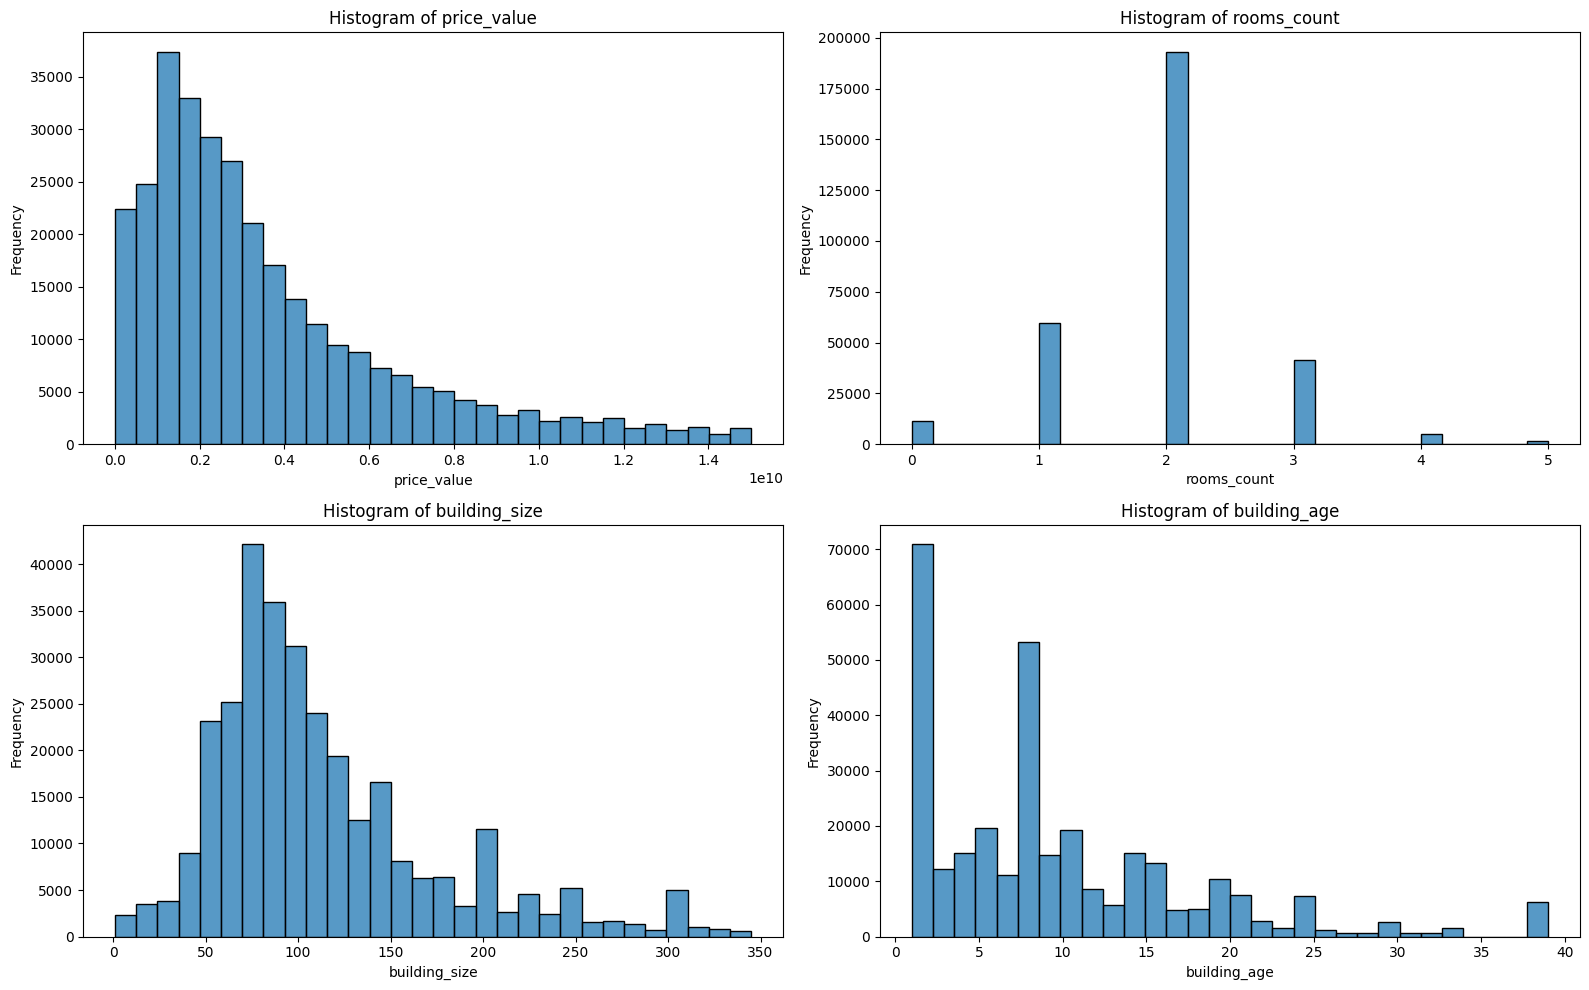

In [194]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns_for_hist, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_divar_clean2[col].dropna(), kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [195]:
df_divar_clean['building_age'].describe()

,building_age
count,372119.000000
mean,9.600614
std,8.112997
min,1.000000
25%,3.000000
50%,8.000000
75%,13.000000
max,39.000000


In [197]:
df_location = df_divar_clean2[['location_latitude', 'location_longitude']].copy()

### Scaling

In [198]:
from sklearn.preprocessing import MinMaxScaler
features = ['price_value', 'location_latitude', 'location_longitude','rooms_count', 'building_size','building_age']

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_divar_clean2[features])

df_scaled = pd.DataFrame(scaled, columns=features, index=df_divar_clean2.index)
df_scaled['has_parking'] = df_divar_clean2['has_parking'].values

df_scaled.head()

,price_value,location_latitude,location_longitude,rooms_count,building_size,building_age,has_parking
7,0.579421,0.723210,0.400148,0.4,0.287791,0.263158,1
8,0.043290,0.722166,0.366171,0.4,0.223837,0.184211,1
10,0.173160,0.726131,0.412200,0.4,0.250000,0.000000,1
12,0.865135,0.758615,0.783525,0.6,0.488372,0.000000,1
13,0.056610,0.528125,0.395302,0.0,0.043605,0.078947,0


### K_MEAN
## first section

<ipython-input-202-1aa591d0ef63>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[['utm_x', 'utm_y']] = df_kmeans.apply(convert_latlon_to_utm, axis=1)
<ipython-input-202-1aa591d0ef63>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[['utm_x', 'utm_y']] = df_kmeans.apply(convert_latlon_to_utm, axis=1)
<ipython-input-202-1aa591d0ef63>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

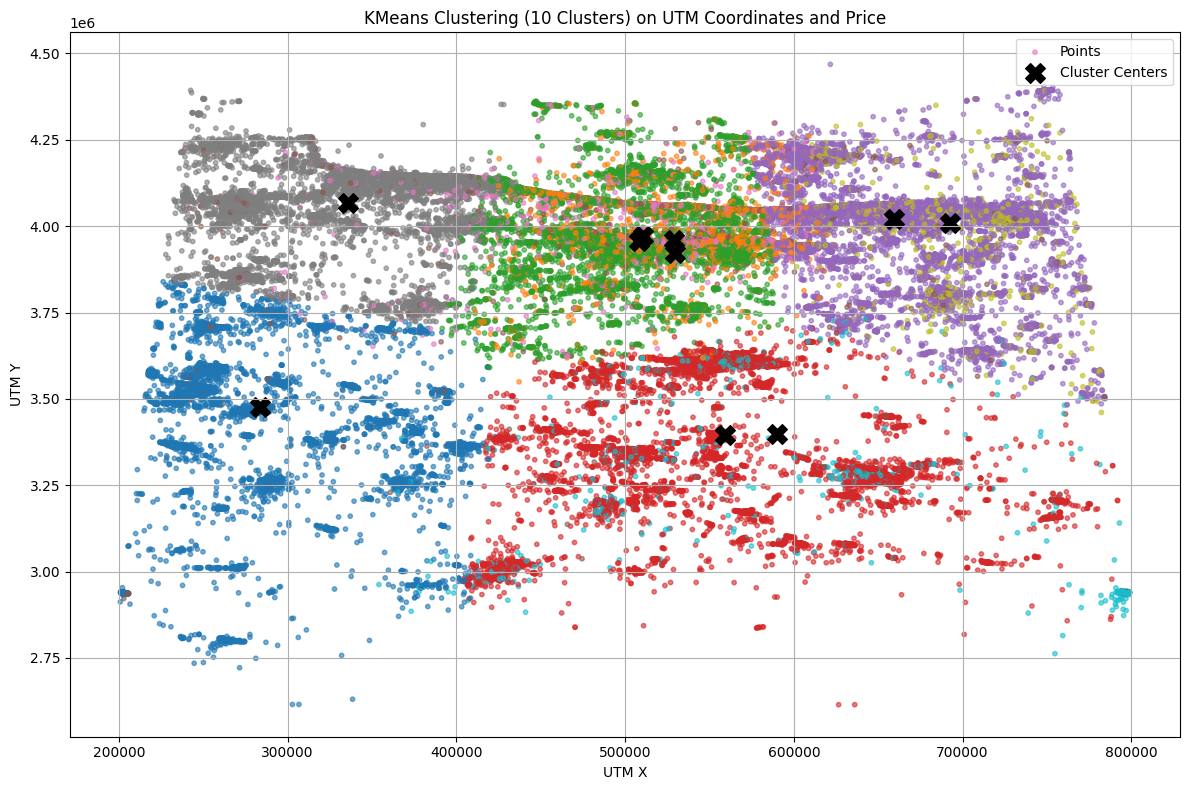

In [202]:
from sklearn.cluster import KMeans

df_kmeans = df_divar_clean2[['price_value', 'location_latitude', 'location_longitude']]

def convert_latlon_to_utm(row):
    x, y, _, _ = utm.from_latlon(row['location_latitude'], row['location_longitude'])
    return pd.Series({'utm_x': x, 'utm_y': y})

df_kmeans[['utm_x', 'utm_y']] = df_kmeans.apply(convert_latlon_to_utm, axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(df_kmeans[['price_value', 'utm_x', 'utm_y']])

kmeans = KMeans(n_clusters=10, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(df_kmeans['utm_x'], df_kmeans['utm_y'], c=df_kmeans['cluster'], cmap='tab10', s=10, alpha=0.6, label='Points')
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, marker='X', label='Cluster Centers')
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("KMeans Clustering (10 Clusters) on UTM Coordinates and Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## second section


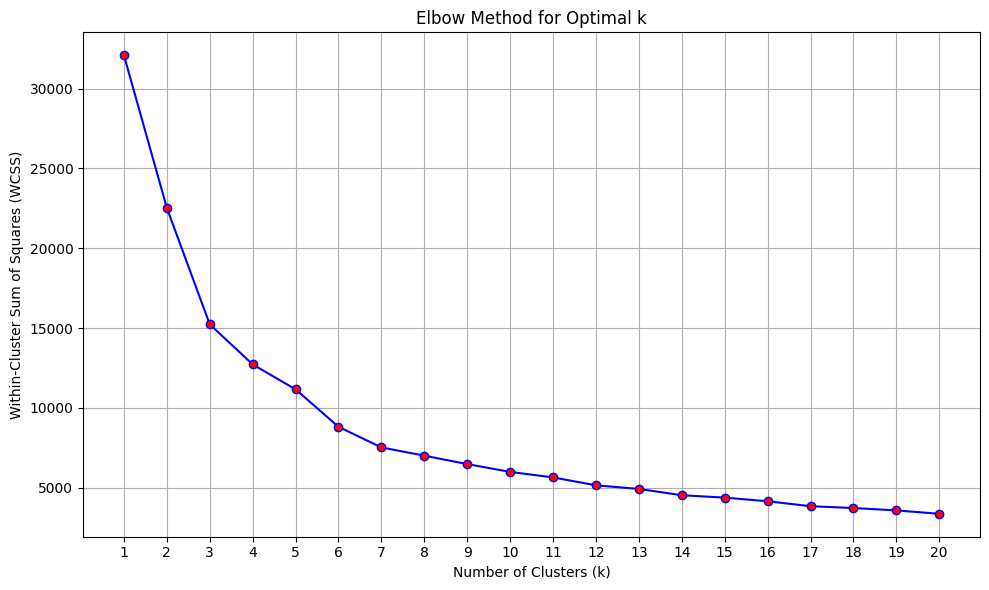

In [203]:
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, 'bo-', markerfacecolor='red')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-204-103ee8209031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = kmeans.fit_predict(X)


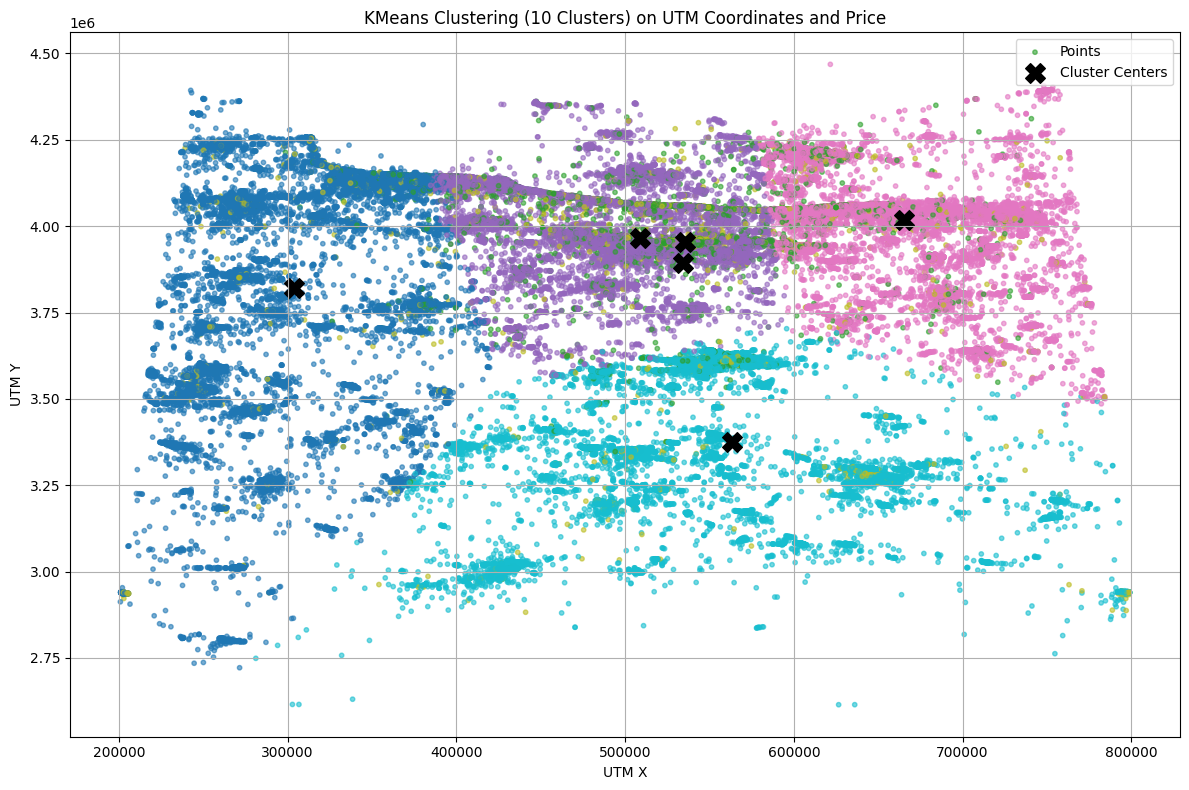

In [204]:
kmeans = KMeans(n_clusters=6, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(df_kmeans['utm_x'], df_kmeans['utm_y'], c=df_kmeans['cluster'], cmap='tab10', s=10, alpha=0.6, label='Points')
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, marker='X', label='Cluster Centers')
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("KMeans Clustering (10 Clusters) on UTM Coordinates and Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## third section

<function matplotlib.pyplot.show(close=None, block=None)>

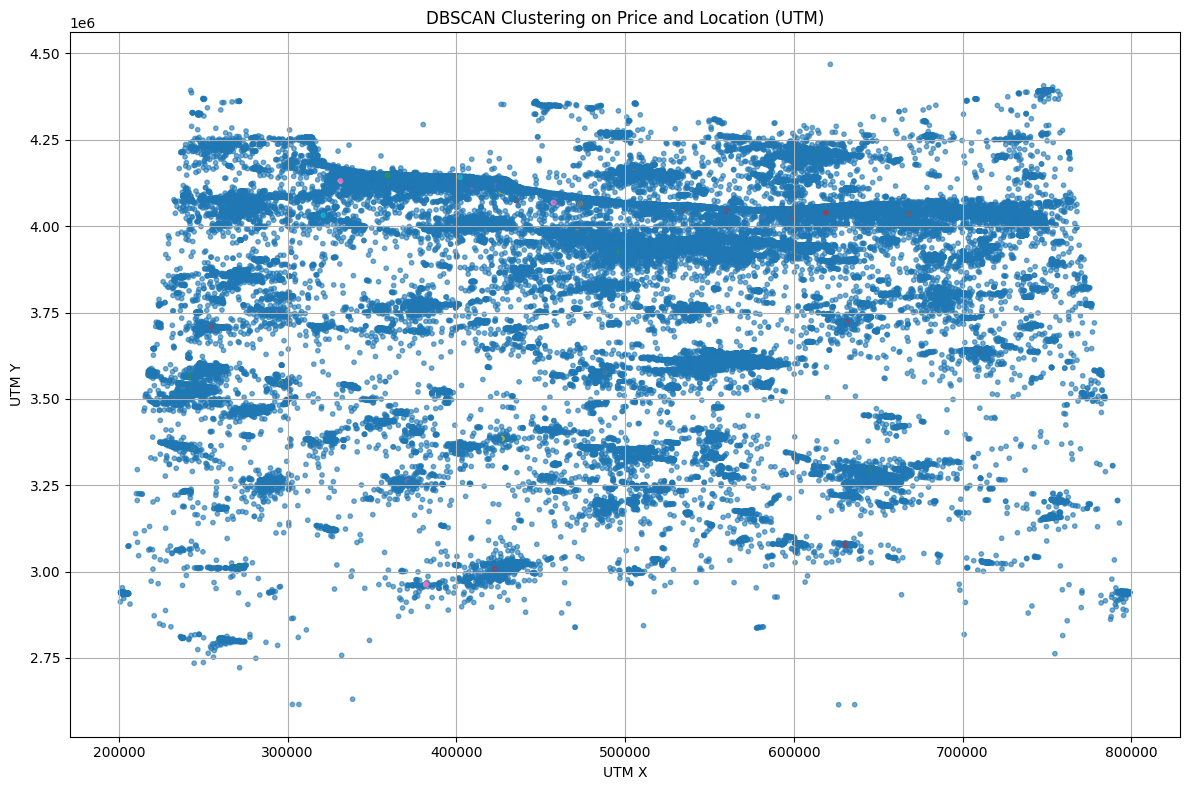

In [214]:
from sklearn.cluster import DBSCAN


X_dbscan = df_scaled[['price_value', 'utm_x', 'utm_y']]

dbscan = DBSCAN(eps=0.08, min_samples=6)
df_scaled['dbscan_cluster'] = dbscan.fit_predict(X_dbscan)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(df_scaled['utm_x'], df_scaled['utm_y'], c=df_scaled['dbscan_cluster'], cmap='tab10', s=10, alpha=0.6)
plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('DBSCAN Clustering on Price and Location (UTM)')
plt.grid(True)
plt.tight_layout()
plt.show